In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=4abc33e617ccc5aaff1614c17adefd01976d0f6ee10dc68e706cc9f456578fa8
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [44]:
import face_recognition
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [45]:
dwayne = face_recognition.load_image_file("dwayne.jpg")

In [46]:
dwayne_encoding = face_recognition.face_encodings(dwayne)[0]

In [47]:
locations = face_recognition.face_locations(dwayne)
for (top, right, bottom, left) in locations:
  cv2.rectangle(dwayne, (left, top), (right, bottom), (0, 255, 0), 2)


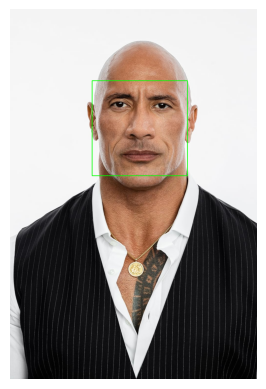

In [48]:
plt.imshow(dwayne)
plt.axis('off')
plt.show()

In [92]:
tom = face_recognition.load_image_file("tom.jpg")

In [93]:
tom_encoding = face_recognition.face_encodings(tom)[0]

In [94]:
tom_locations = face_recognition.face_locations(tom)
for (top, right, bottom, left) in tom_locations:
  cv2.rectangle(tom, (left, top), (right, bottom), (0, 255, 0), 2)


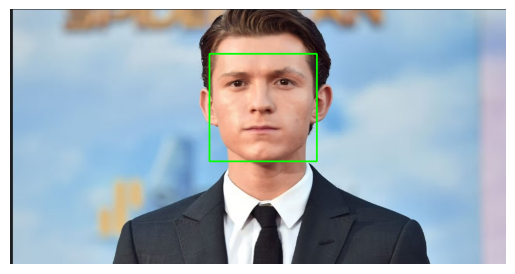

In [95]:
plt.imshow(tom)
plt.axis('off')
plt.show()

In [118]:
dwayne_and_tom = face_recognition.load_image_file("dwayne_and_tom.png")

locations_new = face_recognition.face_locations(dwayne_and_tom)
for (top, right, bottom, left) in locations_new:
  cv2.rectangle(dwayne_and_tom, (left, top), (right, bottom), (0, 255, 0), 2)

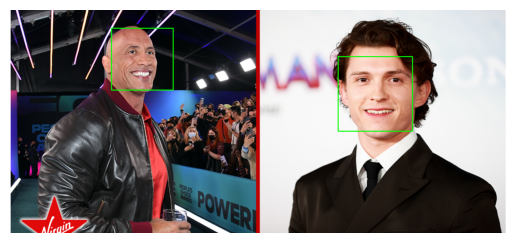

In [119]:
plt.imshow(dwayne_and_tom)
plt.axis('off')
plt.show()

In [122]:
both_enc = face_recognition.face_encodings(dwayne_and_tom)
#knowing that dwayne is on the left we're going to check whether element 0 is dwayne by checking its left coordinate
if locations_new[0][3] < locations_new[1][3]:
  dwayne2_encoding = both_enc[0]
  tom2_encoding = both_enc[1]
else:
  dwayne2_encoding = both_enc[1]
  tom2_encoding = both_enc[0]

In [127]:
faces = [dwayne_encoding,tom_encoding]

compare_faces_left_enc = face_recognition.compare_faces(faces, dwayne2_encoding, tolerance=0.8)
compare_faces_right_enc = face_recognition.compare_faces(faces, tom2_encoding, tolerance=0.8)

print(f"The left side of the image contains dwayne: {compare_faces_left_enc[0]}. The left side of the image contains Tom: {compare_faces_left_enc[1]}")
print(f"The right side of the image contains dwayne: {compare_faces_right_enc[0]}. The right side of the image contains Tom: {compare_faces_right_enc[1]}")

The left side of the image contains dwayne: True. The left side of the image contains Tom: False
The right side of the image contains dwayne: False. The right side of the image contains Tom: True
